In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/cell_images/"))

# Any results you write to the current directory are saved as output.

['cell_images']


In [2]:
path = '/kaggle/input/cell_images/'

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
tfms = get_transforms(do_flip=True,flip_vert=False, max_lighting=0.2, max_zoom=1.05, max_warp=0.2)
data = ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=tfms,
                                  size=224,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)

In [5]:
data.c

2

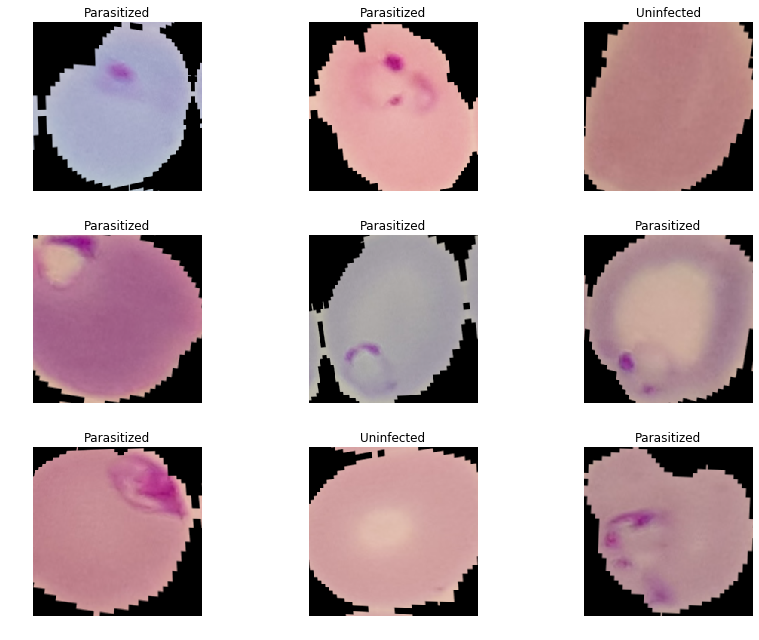

In [6]:
data.show_batch(rows=3, figsize=(12,9))

In [7]:
dropout = [0.3,0.6,0.9,0.2,0.5]
arch = models.resnet50

In [8]:
learn = cnn_learner(data, arch ,ps=dropout,model_dir="/tmp/model/",metrics=[accuracy] )

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
102502400it [00:06, 16147528.79it/s]


In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


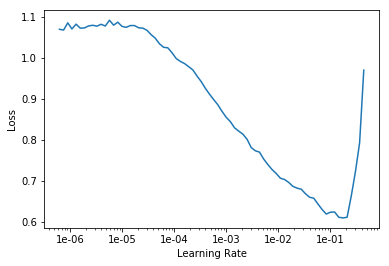

In [10]:
learn.recorder.plot()

In [11]:
lr = 1e-02

In [12]:
learn.fit_one_cycle(6, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.191583,0.145718,0.947922,06:44
1,0.150517,0.143032,0.944838,05:26
2,0.132053,0.122563,0.959535,05:26
3,0.124874,0.098151,0.960806,05:24
4,0.093995,0.088662,0.962439,05:24
5,0.092304,0.086639,0.963890,05:24


In [13]:
learn.save('stage-1-rn50')

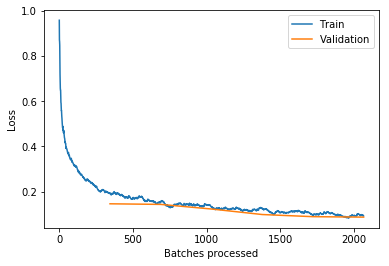

In [14]:
learn.recorder.plot_losses()

In [15]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

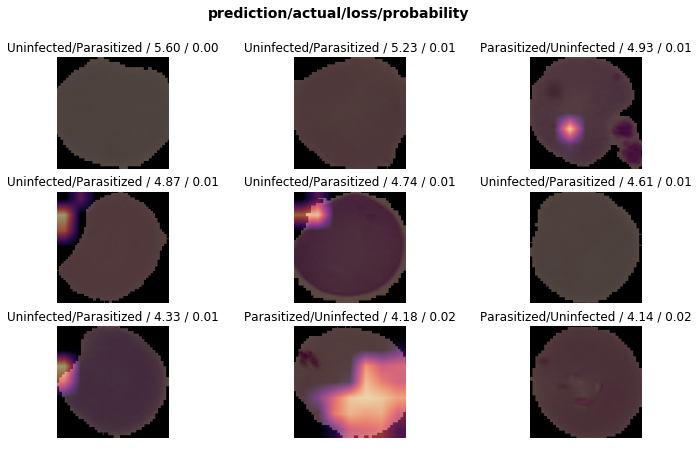

In [16]:
interp.plot_top_losses(9, figsize=(12,7))

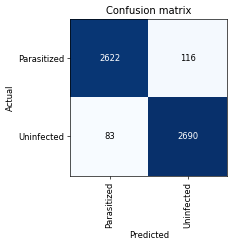

In [17]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

In [18]:
interp.most_confused(min_val=2)

[('Parasitized', 'Uninfected', 116), ('Uninfected', 'Parasitized', 83)]

In [19]:
pred_data= ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(flip_vert=True, max_warp=0),
                                  size=224,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)